<a href="https://colab.research.google.com/github/vpttra/Survival-Analysis-for-Better-Scooter-Company/blob/main/Survival_Analysis_for_Better_Scooter_Company_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case overview**

The analysis is created with the aim to serve Better Scooter Company in optimizing their business processes and
maximizing their profits. The overview of business problem and key objectives of analysis are stated below.

**Business problem**

Since the electric scooter market is growing quickly under the high sustainability and mobility demands, the
competition in this business is tougher than ever. To survive in this economy climate, Better Cooter Company, as a
new business, must embrace all the possibilities of optimizing costs and maximizing profits.

One of the biggest operating costs is the repair cost for broken scooters. Meanwhile, there is a strong relationship
between repair cost and scooters survival rate. If we have the information about the factors contributing to the
scooter survival times, we can find a way to influence the survival time/rate. Moreover, by closely predicting the
time that the scooters are broken, we can prepare our repair schedule and plan accordingly, to minimize the costs.

**About our Data**

Checking our historical dataset, we see that the scooters were purchased from 3 manufacturers, A, B and C and at
different prices. Also, we have information on the average number of complaints in the last three months and the
miles travelled of each scooter, extracted from the scooter’s accident report. From this dataset, we can analyze
and draw some insights about the scooters, and more importantly, build a prediction model to predict the future
broken time of the scooters in our inventory.

**The aim of survival analysis**

Our main interest is to establish a connection between covariates (the features of the scooter) and the results (the
chance that the scooter is broken and the time it happens).

Firstly, we study whether there are subgroups that have different survival rate, meaning that whether we can detect
what factors are affecting the survival rate of our scooters and how we can control it. Secondly, we aim to predict
the survival times for our scooters in inventory. With this information, we can, for example, plan our maintenance
schemes and mechanics schedules to optimize the repair costs and thus maximize our profit.

# **Discussion of Survival analysis methods**

Ultimately, there are 3 major goals in survival analysis:
Firstly, we aim to estimate the survivor and hazard functions. For this, we use Kaplan-Meier
estimator to measure the time-to-failure (failure means being broken) of the scooters.

Secondly, we want to compare survivor and/or hazard functions. Visually, we can compare the
estimated survival curves for the sub-groups and make intuitive interpretations. However, the visual
comparison is highly subjective. Thus, we also use Log Rank statistic test to draw conclusion.

Finally, we conduct Cox Proportional Hazard and Random Survival Forest analysis to assess the
relationship of other variables with the survival and hazard function. Additionally, we use the past
data to build prediction models, test and compare the models and use one of them to predict survival
rate of our scooters in inventory. 

## **Data exploratory analysis**



Firstly, some exploratory data analysis was implemented to get a better understanding of the historical
dataset. On the first glance, the dataset has 6 columns (id, tte, need_repair, usage_lenghts_days,
manufactor, avg_complains, and ride-miles) and 283 rows. The data is cleaned and does not have any
null value.

In the total of 283 scooters, 143 scooters were broken (need_repair = True) and the other 140 scooters
are still working at the end of the investigation period. This means that slightly more than 50% of the
scooters were broken during the investigation period.
From correlation table, there seems to be some correlation between the ‘avg_complains’ and
‘need_repair’. Investigating further by a bar chart of distributions of ‘avg_complains’ by ‘need_repair’
(Figure 1), we see that the scooters receiving more than 5 complaints in the last 3 months have higher
chance of being broken.

From the relative distribution of need_repair by manufactor plot (figure2), we can see that the scooters
from manufactor A are less likely to be broken (around 30%) compared to the scooters from manufactor B
and C, with 59,4% and 87,5% chances that their scooters were broken during the study respectively. 


In [ ]:
#Installing packages
!pip install scikit-survival

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.3 MB/s 


In [ ]:
# import scikit-survival
import sksurv

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
scooter_data  = pd.read_csv('cleaned_better_scooter.csv')
scooter_data.head(20)

,id,tte,need_repair,usage_length_days,manufactor,avg_complains,ride_miles
0,1,57.0,True,58.766838,C,21.3,6.2
1,2,736.0,False,56.447815,C,4.6,88.0
2,3,145.0,True,70.074472,B,1.8,88.4
3,4,275.0,True,54.742087,C,5.3,131.8
4,6,357.0,True,66.260541,A,0.7,60.0
5,7,357.0,False,55.536086,A,1.4,54.0
6,8,352.0,True,53.058263,B,5.4,120.9
7,9,342.0,True,42.509035,C,14.8,221.7
8,10,8.0,True,70.561822,C,12.6,147.3
9,11,536.0,True,53.715365,C,9.6,121.0


In [ ]:
scooter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 283 non-null    int64  
 1   tte                283 non-null    float64
 2   need_repair        283 non-null    bool   
 3   usage_length_days  283 non-null    float64
 4   manufactor         283 non-null    object 
 5   avg_complains      283 non-null    float64
 6   ride_miles         283 non-null    float64
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [ ]:
scooter_data.corr().style

,id,tte,need_repair,usage_length_days,avg_complains,ride_miles
id,1.000000,-0.224873,-0.370867,-0.022566,-0.233024,-0.131589
tte,-0.224873,1.000000,-0.584574,-0.215777,-0.389063,-0.213347
need_repair,-0.370867,-0.584574,1.000000,0.253700,0.577017,0.342298
usage_length_days,-0.022566,-0.215777,0.253700,1.000000,-0.033051,-0.117033
avg_complains,-0.233024,-0.389063,0.577017,-0.033051,1.000000,0.448281
ride_miles,-0.131589,-0.213347,0.342298,-0.117033,0.448281,1.000000


In [ ]:
scooter_data.describe()

,id,tte,usage_length_days,avg_complains,ride_miles
count,283.000000,283.000000,283.000000,283.000000,283.000000
mean,149.717314,342.932862,50.983476,6.944523,127.448410
std,89.122702,189.818332,10.388727,8.340808,93.307624
min,1.000000,6.000000,28.885117,0.300000,6.200000
25%,72.500000,197.500000,43.538495,0.900000,71.000000
50%,148.000000,342.000000,51.251232,2.500000,113.000000
75%,221.500000,473.000000,57.772971,11.450000,160.000000
max,312.000000,744.000000,78.441573,41.000000,1205.000000


In [ ]:
counts= scooter_data['need_repair'].tolist()

143 140


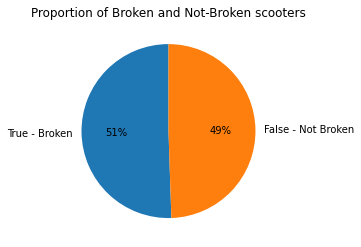

In [ ]:
t = 0
f = 0
for i in counts:
  if counts[i] == True:
    t += 1
  else:
    f += 1
print(t,f)
y = np.array([t,f])
mylabels = ["True - Broken","False - Not Broken"]

plt.pie(y, labels = mylabels, startangle = 90, autopct='%1.0f%%')
plt.title('Proportion of Broken and Not-Broken scooters')
plt.show() 

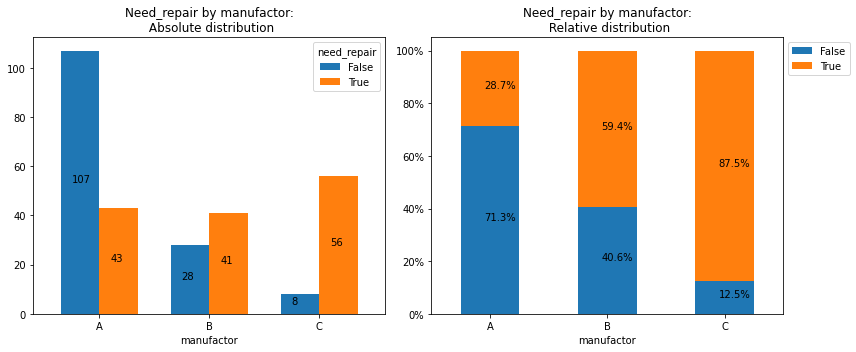

In [ ]:
fig = plt.figure(figsize=(12, 5))
import matplotlib.ticker as mtick
#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = scooter_data.groupby([ 'manufactor','need_repair'])['manufactor'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Need_repair by manufactor:\n Absolute distribution') 

#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height()/2))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = scooter_data.groupby([ 'manufactor','need_repair'])['manufactor'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Need_repair by manufactor:\n Relative distribution') 

#plot bar labels
for p, q in zip(ax2.patches[0:3], ax2.patches[3:6]):
    ax2.annotate(str(round(p.get_height(),1))+'%', (p.get_x()+0.2, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1))+'%', (q.get_x()+0.2, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

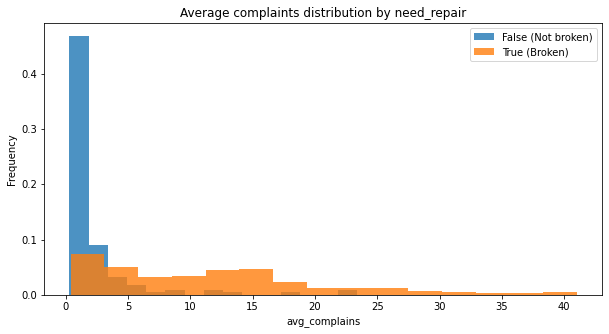

In [ ]:
ax = scooter_data['avg_complains'].loc[scooter_data['need_repair'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='False (Not broken)', figsize = (10,5))
ax = scooter_data['avg_complains'].loc[scooter_data['need_repair'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='True (Broken)', figsize = (10,5))
ax.set_xlabel('avg_complains')
ax.set_title('Average complaints distribution by need_repair')
ax.legend();

# **KM Estimator/Intuitive interpretation**

Firstly, we plot the Kaplan Meier survival curve for all scooters in the historical dataset, from which we see
that the survival rate for all scooters decrease gradually over the investigating time. From day 600 to 700,
the chances that a scooter being broken almost doesn't decrease anymore. However, the rate plunges
down after 700 days. 


In [ ]:
surv_features, surv_labels_df = get_x_y(scooter_data, ['need_repair','tte'],survival = False)
surv_labels = Surv.from_dataframe('need_repair','tte',surv_labels_df)
print('\n======== features for survival analysis ========\n', surv_features[:10])
print('\n======== labels for survival analysis ========\n',surv_labels[:10])


======== features for survival analysis ========
    id  usage_length_days manufactor  avg_complains  ride_miles
0   1          58.766838          C           21.3         6.2
1   2          56.447815          C            4.6        88.0
2   3          70.074472          B            1.8        88.4
3   4          54.742087          C            5.3       131.8
4   6          66.260541          A            0.7        60.0
5   7          55.536086          A            1.4        54.0
6   8          53.058263          B            5.4       120.9
7   9          42.509035          C           14.8       221.7
8  10          70.561822          C           12.6       147.3
9  11          53.715365          C            9.6       121.0

======== labels for survival analysis ========
 [( True,  57.) (False, 736.) ( True, 145.) ( True, 275.) ( True, 357.)
 (False, 357.) ( True, 352.) ( True, 342.) ( True,   8.) ( True, 536.)]


Text(0.5, 1.0, 'Kaplan-Meier survival curvve - all scooters')

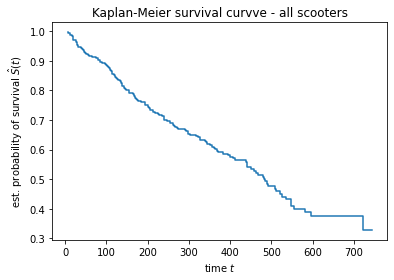

In [ ]:
# fitting kmf to the data and plotting
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(scooter_data["need_repair"], scooter_data["tte"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('Kaplan-Meier survival curvve - all scooters')

In [ ]:
scooter_data['manufactor'].value_counts()

A    150
B     69
C     64
Name: manufactor, dtype: int64

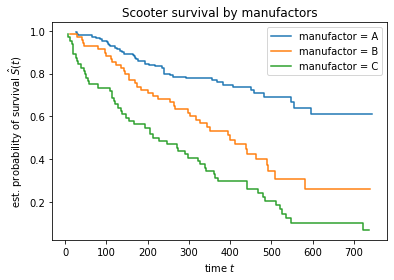

In [ ]:
# check survival curves for different manufactors
for manufactor in ("A", "B","C"):
    mask_treat = scooter_data["manufactor"] == manufactor
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        scooter_data["need_repair"][mask_treat],
        scooter_data["tte"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="manufactor = %s" % manufactor)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('Scooter survival by manufactors')
plt.legend(loc="best")

Then, we plot the KM survival curve for scooters from different manufactors in the same plot. 

Overall,
different manufactor’s scooters have different chances of staying functional (not broken). More than 60%
of scooters from manufactor A are still working after 700 days. Meanwhile, scooters from manufactor B
have survival rate of around 28% after 700 days. 

Lastly, the scooter survival chance decreases most
quickly for the scooters from manufactor C, leaving less than 10% of the scooters still working after 700
days. 

From the intuitive interpretation, we can recommend purchasing scooters from manufactor A,
since their scooters are the most durable, having the highest survival chance at every time point. 

In [ ]:
from sksurv import compare
sksurv.compare.compare_survival(surv_labels, mask_treat, return_stats=True)

(47.96129191725354,
 4.347172406989874e-12,
        counts  observed   expected  statistic
 group                                        
 False     219        84  115.20089  -31.20089
 True       64        56   24.79911   31.20089,
 array([[ 20.29752571, -20.29752571],
        [-20.29752571,  20.29752571]]))

# **Log rank test**

As mentioned earlier in method discussion, visually comparing the survival curves is objective, therefore,
we also draw interpretation from the log rank test.

Log rank test yielded a p-value of 4.347172406989874e-12, which is much smaller than the significance
level of 0.01. This rejects the null hypothesis, and we can now confirm that there are differences in
survival rates of the scooters from different manufactors. 

# **Random forest and survival analysis**

Before building our models, we got rid of redundant column ‘id’ and use get_dummies for one-hotencoding variable ‘manufactor’. Then we split the dataset into training and testing data, build the models
on the training data and test it on test data, the results are below.

Cox Proportional Hazard analysis has concordance index of 0.7758, which is quite good. However, the
concordance index for random forest analysis is even higher, at 0.8144. We decided to report features
importance and predict survival rate for our scooters in inventory by Random Survival Forest model.

In [ ]:
#dropping id column
scooter_data2 = scooter_data.drop('id', axis = 1).copy()

In [ ]:
scooter_data2 = pd.get_dummies(scooter_data2, 
                              drop_first=True,
                              columns=['manufactor'])

In [ ]:
scooter_data2

,tte,need_repair,usage_length_days,avg_complains,ride_miles,manufactor_B,manufactor_C
0,57.0,True,58.766838,21.3,6.2,0,1
1,736.0,False,56.447815,4.6,88.0,0,1
2,145.0,True,70.074472,1.8,88.4,1,0
3,275.0,True,54.742087,5.3,131.8,0,1
4,357.0,True,66.260541,0.7,60.0,0,0
...,...,...,...,...,...,...,...
278,260.0,False,61.184427,1.1,103.0,0,0
279,237.0,False,58.301391,0.6,90.0,0,0
280,229.0,False,62.334355,1.8,65.0,1,0
281,215.0,False,37.999671,0.6,191.0,0,0


**CoxPHSurvivalAnalysis**

In [ ]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

set_config(display="text")  # displays text representation of estimators

surv_features2, surv_labels2_df = get_x_y(scooter_data2, ['need_repair','tte'],survival = False)
surv_labels2 = Surv.from_dataframe('need_repair','tte',surv_labels2_df)

estimator = CoxPHSurvivalAnalysis()
estimator.fit(surv_features2, surv_labels2)

CoxPHSurvivalAnalysis()

In [ ]:
pd.Series(estimator.coef_, index=surv_features2.columns)

usage_length_days    0.048584
avg_complains        0.076235
ride_miles           0.000576
manufactor_B         0.307014
manufactor_C         0.660345
dtype: float64

In [ ]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(surv_features2)
result = concordance_index_censored(surv_labels2["need_repair"], surv_labels2["tte"], prediction)
result[0]

0.7758132154595943

**Random survival forests analysis.**

In [ ]:
# Building training and testing sets
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder


from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

set_config(display="text")  # displays text representation of estimators

surv_features2, surv_labels2_df = get_x_y(scooter_data2, ['need_repair','tte'],survival = False)
surv_labels2 = Surv.from_dataframe('need_repair','tte',surv_labels2_df)
print('\n======== features for survival analysis ========\n', surv_features2[:10])
print('\n======== labels for survival analysis ========\n',surv_labels2[:10])
X = surv_features2
y = surv_labels2


======== features for survival analysis ========
    usage_length_days  avg_complains  ride_miles  manufactor_B  manufactor_C
0          58.766838           21.3         6.2             0             1
1          56.447815            4.6        88.0             0             1
2          70.074472            1.8        88.4             1             0
3          54.742087            5.3       131.8             0             1
4          66.260541            0.7        60.0             0             0
5          55.536086            1.4        54.0             0             0
6          53.058263            5.4       120.9             1             0
7          42.509035           14.8       221.7             0             1
8          70.561822           12.6       147.3             0             1
9          53.715365            9.6       121.0             0             1

======== labels for survival analysis ========
 [( True,  57.) (False, 736.) ( True, 145.) ( True, 275.) ( True,

In [ ]:
random_state = 20

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=random_state)

In [ ]:
rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=5,
                           min_samples_leaf=3,
                           n_jobs=-1,
                           random_state=random_state)

rsf.fit(X_train, y_train)

RandomSurvivalForest(min_samples_split=5, n_estimators=1000, n_jobs=-1,
                     random_state=20)

In [ ]:
rsf.score(X_test, y_test)

0.8144391408114559

Comparing concordance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rsf, X_test, y_test, n_repeats=15, random_state=random_state
)

In [ ]:
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_test.columns
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
avg_complains,0.200716,0.038644
usage_length_days,0.040811,0.012081
manufactor_B,0.010740,0.004117
manufactor_C,0.006603,0.006734
ride_miles,0.006444,0.008548


The result shows that average complaints number is the most important feature for this model. The
‘importances_mean’ indicates that, for example, when relationship between the average complaints in the
last 3 months and the target results are removed by random shuffling, the model score on test data drops
on average by 0.2 points, with the standard deviation of 0.039. Meanwhile, the importance mean for other
features are significantly lower.

# **Test the model with ten scooters**

Now we use our trained model for prediction to predict the survival rate for our 10 scooters in inventory.
The predicted risk scores show that scooters 1, 3 and 8 has lower risks of getting broken than other
scooters. From the plot of the survival probability of all scooters, we can visualize the survival rate or the
chance that a scooter will be broken at a time point.

For example, for scooter 4, during the first 200 days, its survival probability drops dramatically, and it
continues to drop gradually afterwards. We can predict that the scooter 4 is more likely to be broken
within the first 200 days. 


In [ ]:
X_test1 = pd.read_csv('ten_scooters.csv')
X_test2 = X_test1.drop('id', axis = 1).copy()
X_test_10 =  X_test2.drop('manufactor_A', axis = 1).copy()

In [ ]:
X_test_10

,usage_length_days,avg_complains,ride_miles,manufactor_B,manufactor_C
0,56.447815,4.6,88.0,0,1
1,55.536086,1.4,54.0,0,0
2,53.058263,5.4,120.9,1,0
3,45.690505,1.2,72.0,0,0
4,64.647903,11.4,114.0,0,1
5,64.190669,7.8,73.0,0,1
6,52.026065,16.2,241.0,0,1
7,60.538276,11.4,246.0,1,0
8,45.211368,0.9,89.0,0,0
9,60.661483,2.1,98.0,0,1


In [ ]:
pd.Series(rsf.predict(X_test_10))
print('Predict score')

Predict score


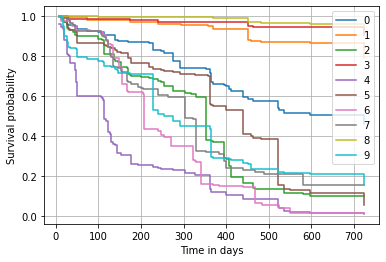

In [ ]:
surv = rsf.predict_survival_function(X_test_10, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

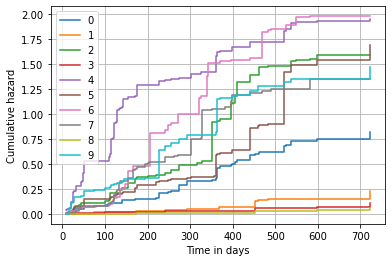

In [ ]:
surv = rsf.predict_cumulative_hazard_function(X_test_10, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rsf, X_test, y_test, n_repeats=15, random_state=random_state
)

In [ ]:
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_test.columns
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
avg_complains,0.200716,0.038644
usage_length_days,0.040811,0.012081
manufactor_B,0.010740,0.004117
manufactor_C,0.006603,0.006734
ride_miles,0.006444,0.008548


# **Summary and Conclusion**

In summary, Kaplan-Meier Estimator shows us that the chances that the scooters get broken decrease
gradually with time. After log rank test confirms that there is relationship between feature manufactor and
the hazard rate, we can recommend that the company buy future scooters from manufactor A.

Both CoxPH and Survival Forest analysis models gave us high concordance index. We used the later
model to predict the survival rate for our 10 scooters. With that prediction, the company can plan the
repair schedule and maintenance plan accordingly. 